In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestCentroid





In [22]:
def clustering(df1):
    X = df1.iloc[:].values
    range_n_clusters = [2,3,4]
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        y_predict = clusterer.fit_predict(X)
        cluster_labels = clusterer.labels_

        clf = NearestCentroid()
        clf.fit(X, y_predict)
        print("Centroids:")
        print(clf.centroids_)

        silhouette_avg = silhouette_score(X, cluster_labels)
        if silhouette_avg > 0.4:
            print("For n_clusters =", n_clusters,
                  "The average silhouette_score is :", silhouette_avg)
            fig, (ax1) = plt.subplots(1, 2)

            fig.set_size_inches(15, 5)

            ax1.set_xlim([-0.1, 1])
            ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

            sample_silhouette_values = silhouette_samples(X, cluster_labels)

            y_lower = 10
            for i in range(n_clusters):
                ith_cluster_silhouette_values = \
                    sample_silhouette_values[cluster_labels == i]

                ith_cluster_silhouette_values.sort()

                size_cluster_i = ith_cluster_silhouette_values.shape[0]
                y_upper = y_lower + size_cluster_i

                color = cm.nipy_spectral(float(i) / n_clusters)
                ax1.fill_betweenx(np.arange(y_lower, y_upper),
                                  0, ith_cluster_silhouette_values,
                                  facecolor=color, edgecolor=color, alpha=0.7)
                ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
                y_lower = y_upper + 10  # 10 for the 0 samples

            ax1.set_title("The silhouette plot for the various clusters.")
            ax1.set_xlabel("The silhouette coefficient values")
            ax1.set_ylabel("Cluster label")
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

            ax1.set_yticks([])  # Clear the yaxis labels / ticks
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#             ax = Axes3D(fig)
#             colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#             ax.scatter(X[:, 1], X[:, 2], X[:, 0],marker='o', s=20, lw=0, alpha=0.7,
#                         c=colors, edgecolor='k')

            plt.suptitle(("Silhouette analysis for HAC-ward clustering on sample data "
                          "with n_clusters = %d" % n_clusters),
                         fontsize=14, fontweight='bold')
    plt.show()

    return

Centroids:
[[6.67375000e+02 1.58032925e+00 1.09895825e+00 5.94089000e-01]
 [2.72000000e+02 1.56792500e+00 1.37500000e+00 5.94089000e-01]]
For n_clusters = 2 The average silhouette_score is : 0.6415770905204325
Centroids:
[[6.21500000e+02 1.68795283e+00 9.37500000e-01 5.94089000e-01]
 [2.72000000e+02 1.56792500e+00 1.37500000e+00 5.94089000e-01]
 [8.05000000e+02 1.25745850e+00 1.58333300e+00 5.94089000e-01]]
For n_clusters = 3 The average silhouette_score is : 0.6657936993057034
Centroids:
[[6.45500000e+02 1.40666675e+00 9.37500000e-01 5.94089000e-01]
 [5.73500000e+02 2.25052500e+00 9.37500000e-01 5.94089000e-01]
 [8.05000000e+02 1.25745850e+00 1.58333300e+00 5.94089000e-01]
 [2.72000000e+02 1.56792500e+00 1.37500000e+00 5.94089000e-01]]
For n_clusters = 4 The average silhouette_score is : 0.520262435579203


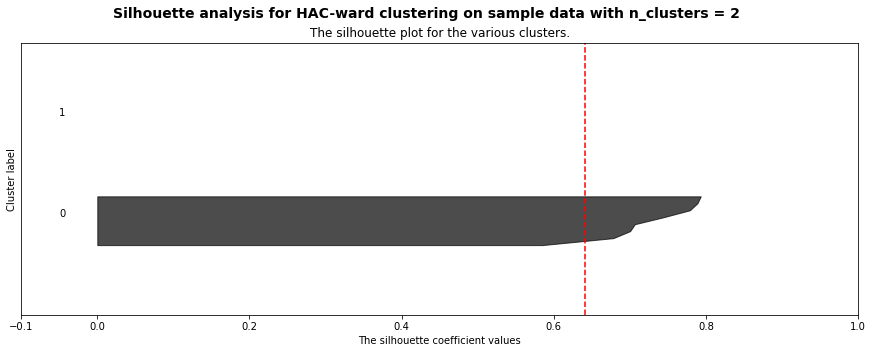

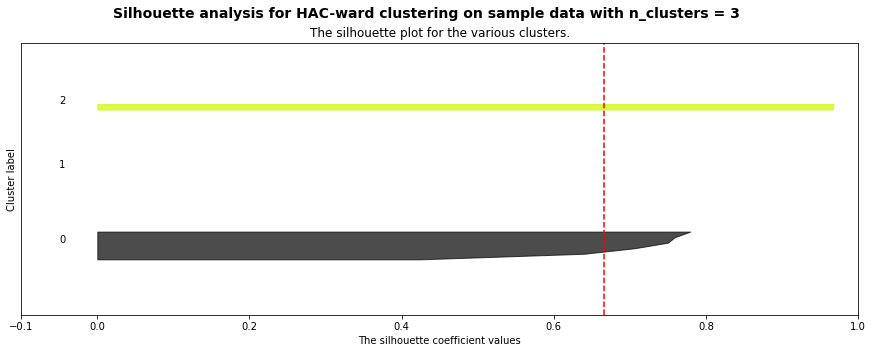

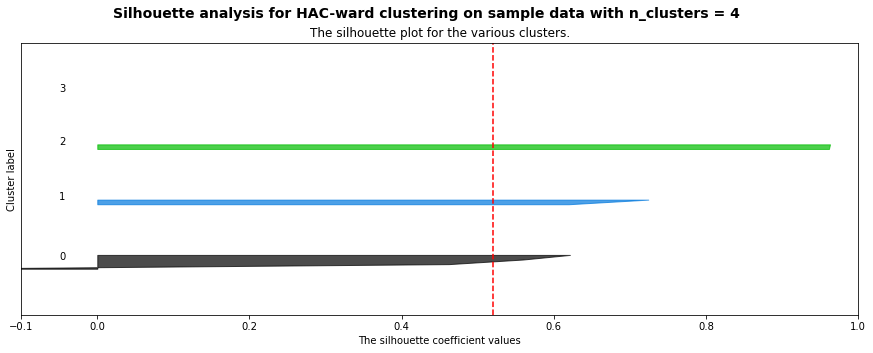

In [21]:
df1 = pd.read_csv('dataset-sample.csv')
clustering(df1)

# from scipy.cluster.hierarchy import centroid, fcluster
# from scipy.spatial.distance import pdist

# import scipy.cluster.hierarchy as sch
# dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
# plt.title("Dendrogram")
# plt.xlabel("X")
# plt.ylabel("Eclidean Distances")
# plt.show()

# clusterer = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
# y_predict = clusterer.fit_predict(X)
# cluster_labels = clusterer.labels_

# clf = NearestCentroid(metric='euclidean')
# clf.fit(X, y_predict)
# print("Centroids:")
# print(clf.centroids_)

# y = pdist(df1)
# print(y)